# Capstone Project: Office Supply Store Data Analysis

## Information about the Project

An office supply store tests a telemarketing campaign to its existing business customers. The company targeted approximately 16,000 customers for the campaign.

## Capstone objectives
- Profile customers that responded to the campaign
- Develop models to identify most profitable customers

    1. Develop a model to estimate the probability of responding to this campaign
    2. Develop a model to estimate the size of the transaction

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 50)

### Import data

In [3]:
df = pd.read_excel('Office Supply Campaign ResultS 7-23-19.xlsx')

### Initial exploration

In [4]:
df.head(3)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
0,86734.0,238.704762,146803.428571,1968-10-01,15.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,97098.0,281.680000,439984.160000,1981-06-15,22.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,100836.0,432.857143,970465.714286,1962-11-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English


In [5]:
df['Customer Number'].duplicated().sum()

0

In [6]:
df.columns = [col.replace(' ', '_').lower() for col in df.columns]

In [7]:
df.columns

Index(['customer_number', 'campaign_period_sales', 'historical_sales_volume',
       'date_of_first_purchase', 'number_of_prior_year_transactions',
       'do_not_direct_mail_solicit', 'do_not_email', 'do_not_telemarket',
       'repurchase_method', 'last_transaction_channel', 'desk',
       'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer',
       'insurance', 'toner', 'office_supplies', 'number_of_employees',
       'language'],
      dtype='object')

In [8]:
df.shape

(16173, 21)

In [9]:
df.dtypes

customer_number                             float64
campaign_period_sales                       float64
historical_sales_volume                     float64
date_of_first_purchase               datetime64[ns]
number_of_prior_year_transactions           float64
do_not_direct_mail_solicit                  float64
do_not_email                                float64
do_not_telemarket                           float64
repurchase_method                            object
last_transaction_channel                     object
desk                                         object
executive_chair                              object
standard_chair                               object
monitor                                      object
printer                                      object
computer                                     object
insurance                                    object
toner                                        object
office_supplies                              object
number_of_em

In [10]:
df.isnull().sum()

customer_number                         1
campaign_period_sales                   1
historical_sales_volume                 1
date_of_first_purchase                  1
number_of_prior_year_transactions       1
do_not_direct_mail_solicit              1
do_not_email                            1
do_not_telemarket                       1
repurchase_method                       1
last_transaction_channel              443
desk                                    0
executive_chair                         2
standard_chair                          2
monitor                                 2
printer                                 2
computer                                1
insurance                               3
toner                                   3
office_supplies                         1
number_of_employees                     3
language                             4472
dtype: int64

In [11]:
df[df.campaign_period_sales.isnull()]

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
16172,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,911,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# target variable has a null value, it will be dropped
df = df[df['campaign_period_sales'].notnull()].reset_index(drop=True)
display(df['campaign_period_sales'].isnull().sum())
df.shape

0

(16172, 21)

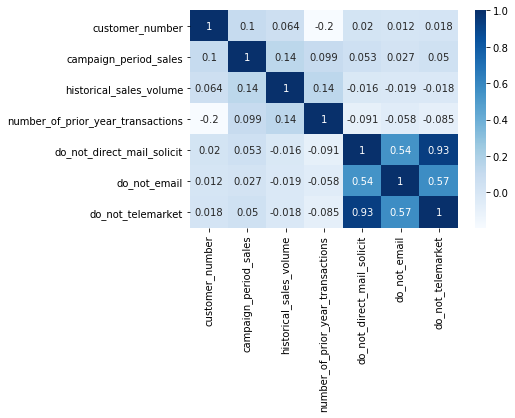

In [13]:
#check for correlations
sn.heatmap(df.corr(), cmap='Blues', annot=True)
plt.show()

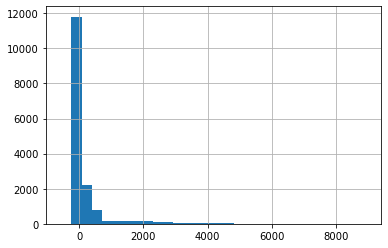

In [14]:
# check target variable - Campaign Period Sales
df['campaign_period_sales'].hist(bins=30)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))
ax.h(x=y_test, y=model2_gbr_preds_test, alpha=0.4);
ax.plot([0, 10000],[0, 10000])
ax.set_title("Actual vs Predicted - Regression", fontsize=16)
# ax.set_xlabel("Actual")
# ax.set_ylabel("Predicted");

ax.set(title="Actual vs Predicted - Regression", xlabel='Actual', ylabel='Predicted');

In [15]:
# # check summary stats of target variable - Campaign Period Sales (it has some negative values)
df['campaign_period_sales'].describe()

count    16172.000000
mean       245.896967
std        720.317450
min       -566.500000
25%          0.000000
50%          0.000000
75%        145.669048
max       8936.850000
Name: campaign_period_sales, dtype: float64

In [16]:
df.loc[(df['campaign_period_sales'] < 0), :]

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
5783,12970830.0,-119.333333,69223.560000,1972-04-15,5.0,1.0,1.0,1.0,NOTICE,WEB,N,N,N,N,N,N,N,N,N,,NaN
5919,13276523.0,-140.960000,500408.000000,1976-10-15,25.0,0.0,1.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
6135,13753769.0,-14.320000,24057.600000,1969-01-01,20.0,0.0,0.0,0.0,NOTICE,WEB,N,N,N,N,N,N,N,N,Y,1-5,English
10689,23849132.0,-421.833333,13543.210000,2006-05-15,3.0,1.0,1.0,1.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN
11934,26677728.0,-161.166667,27398.333333,1993-01-15,10.0,0.0,1.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,N,,NaN
15840,56184607.0,-566.500000,48152.670000,2014-10-31,1.0,1.0,1.0,1.0,NOTICE,WEB,N,N,N,N,N,N,N,N,N,,NaN


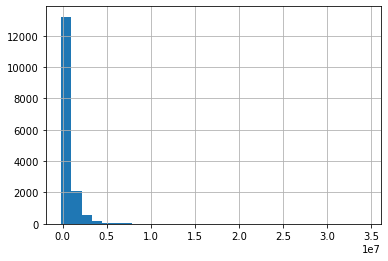

In [17]:
# checking Historical Sales Volume variable
df['historical_sales_volume'].hist(bins=30)

In [18]:
df['historical_sales_volume'].describe()

count    1.617200e+04
mean     6.716763e+05
std      9.566271e+05
min     -1.643031e+05
25%      1.900188e+05
50%      3.965039e+05
75%      7.876159e+05
max      3.441213e+07
Name: historical_sales_volume, dtype: float64

In [19]:
df.loc[(df['historical_sales_volume'] < 0), :]

,customer_number,campaign_period_sales,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
2216,5125266.0,0.0,-126638.40,1995-10-01,18.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,1-5,English
6139,13758714.0,0.0,-20021.76,2015-07-22,16.0,1.0,0.0,1.0,NOTICE,WEB,N,N,N,N,N,N,N,N,Y,1-5,English
9300,20726836.0,0.0,-9184.00,2011-01-05,16.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,1-5,English
12548,28176445.0,0.0,-164303.10,2012-10-31,18.0,1.0,1.0,1.0,AUTO RENEW,PHONE,N,N,N,N,N,N,N,N,N,11-50,English


## Clean data

### Steps to clean data

#### Partition data

In [20]:
X = df.drop('campaign_period_sales', axis=1)
y = df['campaign_period_sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=24)

In [21]:
print(X_train.shape, type(X_train))
print(y_train.shape, type(y_train))

(8086, 20) <class 'pandas.core.frame.DataFrame'>
(8086,) <class 'pandas.core.series.Series'>


#### Prepare target variable

In [22]:
y_train.describe()

count    8086.000000
mean      253.041749
std       738.194214
min      -161.166667
25%         0.000000
50%         0.000000
75%       148.536667
max      7693.400000
Name: campaign_period_sales, dtype: float64

In [23]:
print(f"Number of negatives values:\t{sum(y_train < 0)}")
y_train.loc[y_train < 0]

Number of negatives values:	2


11934   -161.166667
5783    -119.333333
Name: campaign_period_sales, dtype: float64

In [24]:
print(f"Number of negatives values:\t{sum(y_test < 0)}")
y_test.loc[y_test < 0]

Number of negatives values:	4


6135     -14.320000
5919    -140.960000
10689   -421.833333
15840   -566.500000
Name: campaign_period_sales, dtype: float64

In [25]:
def negatives_to_zero(series):
    converted = series.copy()
    converted[converted < 0] = 0
    return converted

In [26]:
y_train = negatives_to_zero(y_train)
y_test = negatives_to_zero(y_test)

In [27]:
display((y_test < 0).sum())
(y_train < 0).sum()

0

0

In [28]:
def binarize_to_class(series):         
    y_class = series > 0
    return y_class.astype(int)

In [29]:
y_train_class = binarize_to_class(y_train)
y_train_class.head()

2632    0
1571    0
2102    1
9273    0
1542    1
Name: campaign_period_sales, dtype: int32

In [30]:
y_test_class = binarize_to_class(y_test)
y_test_class.tail()

4387     1
15942    0
1281     0
780      0
1334     0
Name: campaign_period_sales, dtype: int32

In [31]:
display(y_train_class.value_counts(normalize=True))
y_test_class.value_counts(normalize=True)

0    0.729533
1    0.270467
Name: campaign_period_sales, dtype: float64

0    0.728914
1    0.271086
Name: campaign_period_sales, dtype: float64

#### Clean training data

In [32]:
cat_var = X.select_dtypes('object')
cat_var.head(3)

,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
0,AUTO RENEW,AUTO RENEW,N,N,N,N,N,N,Y,N,Y,6-10,English
1,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,11-50,English
2,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English


In [33]:
for col in cat_var.columns:
    print(col)
    print(cat_var[col].value_counts())
    print()

repurchase_method
NOTICE          11903
AUTO RENEW       4268
PAYMENT PLAN        1
Name: repurchase_method, dtype: int64

last_transaction_channel
MAIL              7769
AUTO RENEW        3141
WEB               2648
PHONE             1096
BRANCH (POS)       633
BRANCH (PHONE)     411
BILLING             18
IT                  14
Name: last_transaction_channel, dtype: int64

desk
N     15260
Y       911
YY        1
Name: desk, dtype: int64

executive_chair
N    15014
Y     1157
Name: executive_chair, dtype: int64

standard_chair
N    15890
Y      281
Name: standard_chair, dtype: int64

monitor
N    15873
Y      298
Name: monitor, dtype: int64

printer
N    15745
Y      426
Name: printer, dtype: int64

computer
N     15941
Y       230
YY        1
Name: computer, dtype: int64

insurance
N     14238
Y      1931
YY        1
Name: insurance, dtype: int64

toner
N     15111
Y      1058
YY        1
Name: toner, dtype: int64

office_supplies
Y    11803
N     4369
Name: office_supplies, dtype: 

In [34]:
X_train['number_of_employees'].value_counts()

6-10       2645
           1835
1-5        1345
11-50      1132
51-100      677
101-500     327
500+        125
Name: number_of_employees, dtype: int64

In [35]:
X_train['number_of_employees'] = X_train['number_of_employees'].replace(' ', np.nan)
X_train['number_of_employees'].value_counts()

6-10       2645
1-5        1345
11-50      1132
51-100      677
101-500     327
500+        125
Name: number_of_employees, dtype: int64

In [36]:
def replace_nan(series):
    serie = series.copy()
    serie = serie.replace(' ', np.nan)
    return serie 

In [37]:
def replace_YY(series):
    new = series.copy()
    new = new.replace('YY', 'Y')
    return new

In [38]:
display(X_train.computer.value_counts())
X_train['computer'] = replace_YY(X_train.computer)
X_train.computer.value_counts()

N     7970
Y      115
YY       1
Name: computer, dtype: int64

N    7970
Y     116
Name: computer, dtype: int64

In [39]:
X_train['insurance'] = replace_YY(X_train.insurance)
X_train['toner'] = replace_YY(X_train.toner)

#### Create a column for number of days since day of purchase

In [40]:
(datetime.now() - X_train['date_of_first_purchase']).dt.days.head(3)

2632    10515
1571    12115
2102    18018
Name: date_of_first_purchase, dtype: int64

In [41]:
X_train['days_since_first_purchase'] = (datetime.now() - X_train['date_of_first_purchase']).dt.days
X_train.days_since_first_purchase.describe()

count     8086.000000
mean      9934.315113
std       3977.438509
min        752.000000
25%       8385.000000
50%       9740.000000
75%      12024.000000
max      26846.000000
Name: days_since_first_purchase, dtype: float64

In [42]:
def create_number_days(series):
    new = series.copy()
    output = (datetime.now() - new).dt.days
    return output

In [43]:
X_train['days_since_first_purchase'] = create_number_days(X_train.date_of_first_purchase)
X_train = X_train.drop(['date_of_first_purchase'], axis=1)
X_train.head(3)

,customer_number,historical_sales_volume,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language,days_since_first_purchase
2632,5959825.0,1.041878e+06,21.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,51-100,English,10515
1571,3747897.0,3.106884e+05,15.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,1-5,English,12115
2102,4854869.0,1.253057e+05,11.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,6-10,English,18018


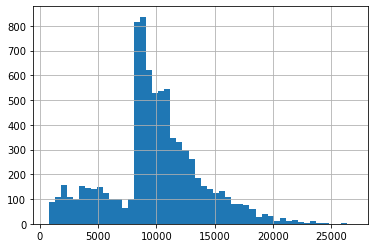

In [44]:
X_train.days_since_first_purchase.hist(bins=50)

#### Convert negatives to zero in Historical Sales Volume variable

In [45]:
X_train['historical_sales_volume'] = negatives_to_zero(X_train['historical_sales_volume'])
X_train['historical_sales_volume'].min()

0.0

#### Convert Product columns to 0's and 1's

In [46]:
bool_cols = ['desk', 'executive_chair', 'standard_chair', 'monitor', 'printer', 'computer', 'insurance', 
    'toner', 'office_supplies',]
X_train[bool_cols].head(3)

,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies
2632,N,N,N,N,N,N,N,N,Y
1571,N,N,N,N,N,N,N,N,Y
2102,N,N,N,N,N,N,N,N,Y


In [47]:
def convert_bools(df):
    dict = {'Y': 1.0, 'N': 0.0}
    return df.applymap(lambda x: dict.get(x, 0.0))

In [48]:
X_train.loc[:, bool_cols] = convert_bools(X_train[bool_cols])
X_train[bool_cols].head(3)

,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies
2632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
bool_cols_df = X_train[bool_cols].copy()

#### Separate numeric and categorical columns

In [50]:
X_train.columns

Index(['customer_number', 'historical_sales_volume',
       'number_of_prior_year_transactions', 'do_not_direct_mail_solicit',
       'do_not_email', 'do_not_telemarket', 'repurchase_method',
       'last_transaction_channel', 'desk', 'executive_chair', 'standard_chair',
       'monitor', 'printer', 'computer', 'insurance', 'toner',
       'office_supplies', 'number_of_employees', 'language',
       'days_since_first_purchase'],
      dtype='object')

In [51]:
#create lists of column names
#bool_cols already created

num_cols = ['historical_sales_volume', 
            'number_of_prior_year_transactions', 
            'days_since_first_purchase']

cat_cols = ['repurchase_method',
            'last_transaction_channel',
            'number_of_employees',
            'language']

In [52]:
#separate numeric and categorical data
num_train = X_train.loc[:, num_cols]
cat_train = X_train.loc[:, cat_cols]

#### Preprocess numeric data

In [53]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [54]:
num_train['number_of_prior_year_transactions'].describe()

count    8086.000000
mean       14.595597
std         8.375522
min         1.000000
25%         8.000000
50%        16.000000
75%        20.000000
max       313.000000
Name: number_of_prior_year_transactions, dtype: float64

In [55]:
si_num = SimpleImputer(strategy = 'median')
num_train_med = si_num.fit_transform(num_train)
num_train_med

array([[1.04187790e+06, 2.10000000e+01, 1.05150000e+04],
       [3.10688400e+05, 1.50000000e+01, 1.21150000e+04],
       [1.25305714e+05, 1.10000000e+01, 1.80180000e+04],
       ...,
       [3.01318977e+05, 1.10000000e+01, 9.40500000e+03],
       [1.24257120e+06, 3.00000000e+00, 1.54470000e+04],
       [2.02737600e+06, 6.00000000e+00, 1.12760000e+04]])

In [56]:
ss = StandardScaler()
num_train_std = ss.fit_transform(num_train_med)
print(ss.mean_, ss.scale_)
num_train_std

[6.67997256e+05 1.45955973e+01 9.93431511e+03] [9.19575824e+05 8.37500376e+00 3.97719256e+03]


array([[ 0.40657946,  0.76470445,  0.14600371],
       [-0.38855834,  0.04828686,  0.54829754],
       [-0.59015421, -0.42932486,  2.03251031],
       ...,
       [-0.39874719, -0.42932486, -0.13308763],
       [ 0.62482498, -1.38454831,  1.38607443],
       [ 1.47826716, -1.02633952,  0.33734471]])

In [57]:
pd.DataFrame(num_train_std, index=num_train.index, columns=num_train.columns)

,historical_sales_volume,number_of_prior_year_transactions,days_since_first_purchase
2632,0.406579,0.764704,0.146004
1571,-0.388558,0.048287,0.548298
2102,-0.590154,-0.429325,2.032510
9273,0.386802,0.764704,0.214897
1542,0.389402,0.167690,1.290781
...,...,...,...
3473,-0.614719,0.645302,-1.541116
8535,-0.409090,-0.190519,-1.475492
14528,-0.398747,-0.429325,-0.133088
899,0.624825,-1.384548,1.386074


In [58]:
num_train_df = pd.DataFrame(num_train_std, index=num_train.index, columns=num_train.columns)

#### Preprocess categorical data

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
cat_train

,repurchase_method,last_transaction_channel,number_of_employees,language
2632,NOTICE,MAIL,51-100,English
1571,NOTICE,MAIL,1-5,English
2102,NOTICE,MAIL,6-10,English
9273,AUTO RENEW,MAIL,6-10,English
1542,AUTO RENEW,AUTO RENEW,NaN,NaN
...,...,...,...,...
3473,NOTICE,MAIL,6-10,English
8535,NOTICE,MAIL,1-5,English
14528,AUTO RENEW,PHONE,6-10,English
899,AUTO RENEW,AUTO RENEW,NaN,NaN


In [61]:
si_cat = SimpleImputer(strategy='most_frequent')
cat_train_mf = si_cat.fit_transform(cat_train)
cat_train_mf

array([['NOTICE', 'MAIL', '51-100', 'English'],
       ['NOTICE', 'MAIL', '1-5', 'English'],
       ['NOTICE', 'MAIL', '6-10', 'English'],
       ...,
       ['AUTO RENEW', 'PHONE', '6-10', 'English'],
       ['AUTO RENEW', 'AUTO RENEW', '6-10', 'English'],
       ['NOTICE', 'WEB', '6-10', 'English']], dtype=object)

##### Create dummy variables

In [62]:
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore')
cat_train_dummies = ohe.fit_transform(cat_train_mf)

In [63]:
cat_train_dummies.shape

(8086, 34)

In [64]:
ohe.categories_

[array(['AUTO RENEW', 'NOTICE', 'PAYMENT PLAN'], dtype=object),
 array(['AUTO RENEW', 'BILLING', 'BRANCH (PHONE)', 'BRANCH (POS)', 'IT',
        'MAIL', 'PHONE', 'WEB'], dtype=object),
 array(['1-5', '101-500', '11-50', '500+', '51-100', '6-10'], dtype=object),
 array(['Arabic', 'Chinese', 'English', 'French', 'German', 'Greek',
        'Hebrew', 'Hindi', 'Italian', 'Japanese', 'Korean', 'Pashto',
        'Polish', 'Portuguese', 'Russian', 'Spanish', 'Vietnamese'],
       dtype=object)]

In [65]:
cat_cols

['repurchase_method',
 'last_transaction_channel',
 'number_of_employees',
 'language']

In [66]:
#create dataframe from dummies arrays
def create_dummy_cols(cat_cols, ohe_c):
    dummy_cols = []
    for col, cat_set in zip(cat_cols, ohe_c):
        for cat in cat_set:
            dummy_cols.append(col+'_'+str(cat))
    return dummy_cols
dummy_cols = create_dummy_cols(cat_cols, ohe.categories_)
len(dummy_cols)

34

In [67]:
pd.DataFrame(cat_train_dummies, index=cat_train.index, columns=dummy_cols)

,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,repurchase_method_PAYMENT PLAN,last_transaction_channel_AUTO RENEW,last_transaction_channel_BILLING,last_transaction_channel_BRANCH (PHONE),last_transaction_channel_BRANCH (POS),last_transaction_channel_IT,last_transaction_channel_MAIL,last_transaction_channel_PHONE,last_transaction_channel_WEB,number_of_employees_1-5,number_of_employees_101-500,number_of_employees_11-50,number_of_employees_500+,number_of_employees_51-100,number_of_employees_6-10,language_Arabic,language_Chinese,language_English,language_French,language_German,language_Greek,language_Hebrew,language_Hindi,language_Italian,language_Japanese,language_Korean,language_Pashto,language_Polish,language_Portuguese,language_Russian,language_Spanish,language_Vietnamese
2632,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1571,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2102,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9273,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1542,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8535,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14528,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
#confirmation
cat_train.loc[13418]

repurchase_method            NOTICE
last_transaction_channel       MAIL
number_of_employees            6-10
language                    English
Name: 13418, dtype: object

In [69]:
cat_train_df = pd.DataFrame(cat_train_dummies, index=cat_train.index, columns=dummy_cols)

#### Combine numeric, boolean and categorical data

In [70]:
X_train_prepared = pd.concat([num_train_df, bool_cols_df, cat_train_df], axis=1)
X_train_prepared

,historical_sales_volume,number_of_prior_year_transactions,days_since_first_purchase,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,repurchase_method_PAYMENT PLAN,last_transaction_channel_AUTO RENEW,last_transaction_channel_BILLING,last_transaction_channel_BRANCH (PHONE),last_transaction_channel_BRANCH (POS),last_transaction_channel_IT,last_transaction_channel_MAIL,last_transaction_channel_PHONE,last_transaction_channel_WEB,number_of_employees_1-5,number_of_employees_101-500,number_of_employees_11-50,number_of_employees_500+,number_of_employees_51-100,number_of_employees_6-10,language_Arabic,language_Chinese,language_English,language_French,language_German,language_Greek,language_Hebrew,language_Hindi,language_Italian,language_Japanese,language_Korean,language_Pashto,language_Polish,language_Portuguese,language_Russian,language_Spanish,language_Vietnamese
2632,0.406579,0.764704,0.146004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1571,-0.388558,0.048287,0.548298,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2102,-0.590154,-0.429325,2.032510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9273,0.386802,0.764704,0.214897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1542,0.389402,0.167690,1.290781,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,-0.614719,0.645302,-1.541116,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8535,-0.409090,-0.190519,-1.475492,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14528,-0.398747,-0.429325,-0.133088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
899,0.624825,-1.384548,1.386074,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Cleaning testing data (X_test)

In [71]:
X_test.head(3)

,customer_number,historical_sales_volume,date_of_first_purchase,number_of_prior_year_transactions,do_not_direct_mail_solicit,do_not_email,do_not_telemarket,repurchase_method,last_transaction_channel,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,number_of_employees,language
5263,11846929.0,144336.152381,1997-07-01,17.0,0.0,0.0,0.0,AUTO RENEW,PHONE,N,N,N,N,N,N,N,N,Y,6-10,English
11766,26287782.0,209678.680000,1994-02-01,19.0,0.0,0.0,0.0,NOTICE,MAIL,N,N,N,N,N,N,N,N,Y,1-5,English
5319,11964105.0,607150.700000,2004-09-13,7.0,0.0,0.0,0.0,AUTO RENEW,PHONE,N,N,N,N,N,N,N,N,N,6-10,English


In [72]:
# replace ' ' for Nan in 'number_of_employees'
X_test['number_of_employees'] = replace_nan(X_test.number_of_employees)

# fix product columns
X_test['desk'] = replace_YY(X_test.desk)

# create column for days since first purchase
if X_test.columns[2] == 'date_of_first_purchase':
    X_test['days_since_first_purchase'] = create_number_days(X_test.date_of_first_purchase)
    X_test = X_test.drop(['date_of_first_purchase'], axis=1)

# convert negatives to zero in Historical Sales Volume variable
X_test['historical_sales_volume'] = negatives_to_zero(X_test.historical_sales_volume)

# convert Product columns to 0's and 1's
X_test.loc[:, bool_cols] = convert_bools(X_test[bool_cols])
bool_cols_test_df = X_test[bool_cols].copy()

# separate numeric and categorical data
num_test = X_test.loc[:, num_cols]
cat_test = X_test.loc[:, cat_cols]

# preprocess numeric data
num_test_med = si_num.transform(num_test)
num_test_std = ss.transform(num_test_med)
num_test_df = pd.DataFrame(num_test_std, index=num_test.index, columns=num_test.columns)

# preprocess categorical data
cat_test_mf = si_cat.transform(cat_test)
cat_test_dummies = ohe.transform(cat_test_mf)
dummy_cols_test = create_dummy_cols(cat_cols, ohe.categories_)
cat_test_df = pd.DataFrame(cat_test_dummies, index=cat_test.index, columns=dummy_cols_test)

# Combine numeric, boolean and categorical data
X_test_prepared = pd.concat([num_test_df, bool_cols_test_df, cat_test_df], axis=1)

In [73]:
X_test_prepared

,historical_sales_volume,number_of_prior_year_transactions,days_since_first_purchase,desk,executive_chair,standard_chair,monitor,printer,computer,insurance,toner,office_supplies,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,repurchase_method_PAYMENT PLAN,last_transaction_channel_AUTO RENEW,last_transaction_channel_BILLING,last_transaction_channel_BRANCH (PHONE),last_transaction_channel_BRANCH (POS),last_transaction_channel_IT,last_transaction_channel_MAIL,last_transaction_channel_PHONE,last_transaction_channel_WEB,number_of_employees_1-5,number_of_employees_101-500,number_of_employees_11-50,number_of_employees_500+,number_of_employees_51-100,number_of_employees_6-10,language_Arabic,language_Chinese,language_English,language_French,language_German,language_Greek,language_Hebrew,language_Hindi,language_Italian,language_Japanese,language_Korean,language_Pashto,language_Polish,language_Portuguese,language_Russian,language_Spanish,language_Vietnamese
5263,-0.569459,0.287093,-0.389550,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11766,-0.498402,0.525899,-0.076264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5319,-0.066168,-0.906937,-1.051072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4807,0.274909,-1.265145,-0.725717,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7311,-0.093920,0.406496,1.875364,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4387,-0.327943,0.525899,1.861787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15942,1.805663,-0.906937,-0.374212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1281,0.718982,0.406496,-0.366167,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,-0.652546,0.764704,0.138461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Create first model (classifier)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
model1_dt = DecisionTreeClassifier(max_depth=50, random_state=24)
model1_dt.fit(X_train_prepared, y_train_class)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=50, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=24, splitter='best')

In [76]:
model1_dt_preds = model1_dt.predict(X_train_prepared)
model1_dt_preds

array([0, 0, 1, ..., 1, 1, 0])

### Evaluate performance

In [77]:
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict

In [78]:
def evaluate_performance_classifier(model, preds):
    print(f"Score train set:\t { model.score(X_train_prepared, y_train_class) }")
    print(f"Score test set:\t\t { model.score(X_test_prepared, y_test_class) }\n")
    print(f"Cross val score:\t { cross_val_score(model, X_train_prepared, y_train_class, cv=5)}")
    print(f"Cross val precision:\t { cross_val_score(model, X_train_prepared, y_train_class, cv=5, scoring='precision') }\n")
    print(f"Class Report:\n {classification_report(y_train_class, preds)}")

In [79]:
evaluate_performance_classifier(model1_dt, model1_dt_preds)

Score train set:	 1.0
Score test set:		 0.779124412564927

Cross val score:	 [0.78986403 0.78231293 0.79468151 0.79591837 0.79282622]
Cross val precision:	 [0.60652174 0.59770115 0.61904762 0.61706783 0.61731207]

Class Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5899
           1       1.00      1.00      1.00      2187

    accuracy                           1.00      8086
   macro avg       1.00      1.00      1.00      8086
weighted avg       1.00      1.00      1.00      8086



In [80]:
def get_feat_imp(X, model):
    feat = []
    for col,imp in zip(X.columns, model.feature_importances_):
        feat.append((col, round(imp, 4)))
    df = pd.DataFrame(feat, columns=['Feature', 'Coef. Importance'])
    return df.sort_values(by='Coef. Importance', ascending=False)

In [81]:
get_feat_imp(X_train_prepared, model1_dt)

,Feature,Coef. Importance
2,days_since_first_purchase,0.5442
0,historical_sales_volume,0.1696
1,number_of_prior_year_transactions,0.0887
6,monitor,0.0307
11,office_supplies,0.0192
20,last_transaction_channel_MAIL,0.0149
28,number_of_employees_6-10,0.0134
9,insurance,0.0116
25,number_of_employees_11-50,0.0105
22,last_transaction_channel_WEB,0.0105


#### Hypertuning parameters

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [6, 8, 10, 12],
    'min_samples_split': [2, 3, 4, 5]
}
model1_rs = DecisionTreeClassifier()

In [84]:
rs = RandomizedSearchCV(model1_rs, param_grid, n_jobs=-1, cv=5)
rs.fit(X_train_prepared, y_train_class)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [85]:
rs.best_params_

{'min_samples_split': 2, 'max_depth': 6, 'criterion': 'entropy'}

In [86]:
rs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [87]:
rs.best_estimator_.score(X_test_prepared, y_test_class)

0.8616126638634677

#### Second model with best parameters

In [88]:
model2_dt = DecisionTreeClassifier(max_depth=6, min_samples_split=5, criterion='entropy', random_state=24)
model2_dt.fit(X_train_prepared, y_train_class)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=24, splitter='best')

In [89]:
model2_dt_preds = model2_dt.predict(X_train_prepared)
model2_dt_preds

array([0, 0, 1, ..., 1, 1, 0])

In [90]:
evaluate_performance_classifier(model2_dt, model2_dt_preds)

Score train set:	 0.8671778382389315
Score test set:		 0.8617363344051447

Cross val score:	 [0.86279357 0.85776129 0.85652443 0.85034014 0.85776129]
Cross val precision:	 [0.76341463 0.7804878  0.75689223 0.73838631 0.78729282]

Class Report:
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      5899
           1       0.78      0.70      0.74      2187

    accuracy                           0.87      8086
   macro avg       0.84      0.82      0.83      8086
weighted avg       0.86      0.87      0.86      8086



In [91]:
get_feat_imp(X_train_prepared, model2_dt)

,Feature,Coef. Importance
2,days_since_first_purchase,0.8919
1,number_of_prior_year_transactions,0.0376
6,monitor,0.0339
0,historical_sales_volume,0.0152
5,standard_chair,0.0048
26,number_of_employees_500+,0.0038
3,desk,0.0031
36,language_Hindi,0.0027
4,executive_chair,0.0022
8,computer,0.0016


#### Select important features and run new model

In [92]:
# features with importance score
imp_feat = ['days_since_first_purchase', 'number_of_prior_year_transactions', 'historical_sales_volume', 'monitor',
            'standard_chair', 'number_of_employees_500+', 'desk']

In [93]:
X_train_prepared_f = X_train_prepared[imp_feat]
X_train_prepared_f.head(2)

,days_since_first_purchase,number_of_prior_year_transactions,historical_sales_volume,monitor,standard_chair,number_of_employees_500+,desk
2632,0.146004,0.764704,0.406579,0.0,0.0,0.0,0.0
1571,0.548298,0.048287,-0.388558,0.0,0.0,0.0,0.0


In [94]:
model3_dt = DecisionTreeClassifier(max_depth=6,  min_samples_split=5, criterion='entropy', random_state=24)
model3_dt.fit(X_train_prepared_f, y_train_class)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=24, splitter='best')

In [95]:
display(model3_dt.score(X_train_prepared_f, y_train_class))
model3_dt.score(X_test_prepared[imp_feat], y_test_class)

0.8673015087806084

0.8602522879050211

In [96]:
cross_val_score(model3_dt, X_train_prepared_f, y_train_class, cv=5)

array([0.85846724, 0.86085343, 0.85837972, 0.84972171, 0.85714286])

In [97]:
cross_val_score(model3_dt, X_train_prepared_f, y_train_class, cv=5, scoring = 'precision')

array([0.76322418, 0.78648649, 0.76262626, 0.7425    , 0.78512397])

In [98]:
model3_dt_preds = model3_dt.predict(X_train_prepared_f)
print(classification_report(y_train_class, model3_dt_preds))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      5899
           1       0.79      0.70      0.74      2187

    accuracy                           0.87      8086
   macro avg       0.84      0.81      0.83      8086
weighted avg       0.86      0.87      0.86      8086



In [99]:
get_feat_imp(X_train_prepared_f, model3_dt)

,Feature,Coef. Importance
0,days_since_first_purchase,0.8943
1,number_of_prior_year_transactions,0.0410
3,monitor,0.0339
2,historical_sales_volume,0.0191
4,standard_chair,0.0048
5,number_of_employees_500+,0.0038
6,desk,0.0031


In [100]:
predict_proba_3 = model3_dt.predict_proba(X_train_prepared_f)
predict_proba_3

array([[0.94619347, 0.05380653],
       [0.94619347, 0.05380653],
       [0.16808149, 0.83191851],
       ...,
       [0.2179878 , 0.7820122 ],
       [0.        , 1.        ],
       [0.94619347, 0.05380653]])

In [101]:
(unique, counts) = np.unique(model3_dt_preds, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0, 6136],
       [   1, 1950]], dtype=int64)

In [102]:
X_train_prepared_f.shape

(8086, 7)

#### Compare with Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model1_lr = LogisticRegression(solver='liblinear', random_state=24)
model1_lr.fit(X_train_prepared, y_train_class)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=24, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [105]:
model1_lr_preds = model1_lr.predict(X_train_prepared)
model1_lr_preds

array([0, 0, 0, ..., 0, 1, 0])

In [106]:
evaluate_performance_classifier(model1_lr, model1_lr_preds)

Score train set:	 0.7849369280237447
Score test set:		 0.7858026218154835

Cross val score:	 [0.7855377  0.78107607 0.76932591 0.7860235  0.79468151]
Cross val precision:	 [0.8013245  0.79020979 0.70253165 0.8013245  0.83544304]

Class Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87      5899
           1       0.80      0.28      0.41      2187

    accuracy                           0.78      8086
   macro avg       0.79      0.62      0.64      8086
weighted avg       0.79      0.78      0.74      8086



Best model for classification so far:  Model3 (DecisionTreeClassifier)

### Implement Ensemble Methods to try to improve performance in models (Classiffiers)

In [107]:
# Bagging classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score

model1_bagg = BaggingClassifier()
model1_bagg.fit(X_train_prepared, y_train_class)
model1_bagg_preds = model1_bagg.predict(X_train_prepared)
model1_bagg_preds

array([0, 0, 1, ..., 1, 1, 0])

In [108]:
evaluate_performance_classifier(model1_bagg, model1_bagg_preds)

Score train set:	 0.9859015582488251
Score test set:		 0.8402176601533514

Cross val score:	 [0.84487021 0.83549784 0.8410637  0.83302412 0.83240569]
Cross val precision:	 [0.70951157 0.74438202 0.74929577 0.73657289 0.73262032]

Class Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      5899
           1       0.99      0.96      0.97      2187

    accuracy                           0.99      8086
   macro avg       0.99      0.98      0.98      8086
weighted avg       0.99      0.99      0.99      8086



In [109]:
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model1_rfc = RandomForestClassifier(n_estimators=100, max_features=7)
model1_rfc.fit(X_train_prepared, y_train_class)
model1_rfc_preds = model1_rfc.predict(X_train_prepared)

In [110]:
evaluate_performance_classifier(model1_rfc, model1_rfc_preds)

Score train set:	 1.0
Score test set:		 0.8476378926539698

Cross val score:	 [0.8566131  0.84601113 0.83364255 0.84353741 0.84415584]
Cross val precision:	 [0.7849162  0.79113924 0.77377049 0.76023392 0.790625  ]

Class Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5899
           1       1.00      1.00      1.00      2187

    accuracy                           1.00      8086
   macro avg       1.00      1.00      1.00      8086
weighted avg       1.00      1.00      1.00      8086



In [111]:
param_grid_rf = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [14, 16, 18],
    'min_samples_split': [3, 4, 5, 6],
    'n_estimators': [200, 300, 400],
    'max_features': [12, 14, 16, 18]
}
model1_rfc_rs = RandomForestClassifier()

In [112]:
rfc_rs = RandomizedSearchCV(model1_rfc_rs, param_grid_rf, n_jobs=-1, cv=5, random_state=42)
rfc_rs.fit(X_train_prepared, y_train_class)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [113]:
rfc_rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'max_features': 18,
 'max_depth': 14,
 'criterion': 'gini'}

In [114]:
rfc_rs.best_estimator_.score(X_test_prepared, y_test_class)

0.864704427405392

In [115]:
model2_rfc = RandomForestClassifier(**rfc_rs.best_params_, random_state=42)
model2_rfc.fit(X_train_prepared, y_train_class)
model2_rfc_preds = model2_rfc.predict(X_train_prepared)
model2_rfc_preds

array([0, 0, 1, ..., 1, 1, 0])

In [240]:
model2_rfc

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=14, max_features=18,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [116]:
evaluate_performance_classifier(model2_rfc, model2_rfc_preds)

Score train set:	 0.9063813999505318
Score test set:		 0.8660648033638387

Cross val score:	 [0.868356   0.86641929 0.85776129 0.85899814 0.86641929]
Cross val precision:	 [0.77506112 0.80108992 0.78201635 0.75802469 0.80662983]

Class Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      5899
           1       0.87      0.77      0.82      2187

    accuracy                           0.91      8086
   macro avg       0.89      0.86      0.88      8086
weighted avg       0.90      0.91      0.90      8086



In [117]:
get_feat_imp(X_train_prepared, model2_rfc)

,Feature,Coef. Importance
2,days_since_first_purchase,0.6542
0,historical_sales_volume,0.0902
1,number_of_prior_year_transactions,0.0753
6,monitor,0.0264
11,office_supplies,0.0167
5,standard_chair,0.0135
8,computer,0.0094
20,last_transaction_channel_MAIL,0.0090
28,number_of_employees_6-10,0.0083
22,last_transaction_channel_WEB,0.0076


In [201]:
feat_imp_class = get_feat_imp(X_train_prepared, model2_rfc)
feat_imp_class.to_excel("fi_class.xlsx")

In [247]:
yyyy = feat_imp_class.T

In [250]:
yyyy.plot(kind='bar', y='Feature');

KeyError: 'Feature'

In [118]:
# features with importance score
imp_feat = ['days_since_first_purchase', 'number_of_prior_year_transactions', 'historical_sales_volume', 'monitor',
            'standard_chair', 'office_supplies',]
X_train_prepared_f = X_train_prepared[imp_feat]
X_test_prepared_f = X_test_prepared[imp_feat]
X_train_prepared_f.head(2)

,days_since_first_purchase,number_of_prior_year_transactions,historical_sales_volume,monitor,standard_chair,office_supplies
2632,0.146004,0.764704,0.406579,0.0,0.0,1.0
1571,0.548298,0.048287,-0.388558,0.0,0.0,1.0


In [119]:
model3_rfc = RandomForestClassifier(criterion='entropy', max_depth= 14, min_samples_split= 16, n_estimators= 400)
model3_rfc.fit(X_train_prepared_f, y_train_class)
model3_rfc_preds = model3_rfc.predict(X_train_prepared_f)
model3_rfc_preds

array([0, 0, 1, ..., 1, 1, 0])

In [120]:
print(f"Score train set:\t { model3_rfc.score(X_train_prepared_f, y_train_class) }")
print(f"Score test set:\t\t { model3_rfc.score(X_test_prepared_f, y_test_class) }\n")
print(f"Cross val score:\t { cross_val_score(model3_rfc, X_train_prepared_f, y_train_class, cv=5)}")
print(f"Cross val precision:\t { cross_val_score(model3_rfc, X_train_prepared_f, y_train_class, cv=5, scoring='precision') }\n")

Score train set:	 0.8849863962404155
Score test set:		 0.8650754390304229

Cross val score:	 [0.86959209 0.86580087 0.85776129 0.85405071 0.86209029]
Cross val precision:	 [0.77912621 0.79002625 0.77777778 0.74876847 0.79132791]



In [121]:
print(f"Class Report:\n {classification_report(y_train_class, model3_rfc_preds)}")

Class Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92      5899
           1       0.82      0.73      0.77      2187

    accuracy                           0.88      8086
   macro avg       0.86      0.84      0.85      8086
weighted avg       0.88      0.88      0.88      8086



### Best model: RandomForestClassifier (model2_rfc) [Score = 0.86, Precision = 0.9]

In [122]:
model2_rfc_preds_test = model2_rfc.predict(X_test_prepared)
compare_classification_result = pd.DataFrame({'Actual': y_test_class, 'Predicted': model2_rfc_preds_test})
compare_classification_result

,Actual,Predicted
5263,0,0
11766,1,1
5319,0,0
4807,0,0
7311,1,1
...,...,...
4387,1,1
15942,0,0
1281,0,0
780,0,0


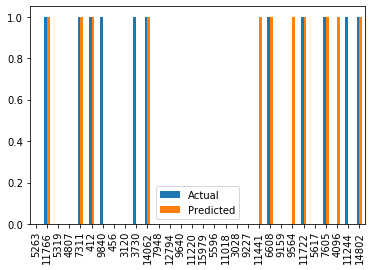

In [123]:
compare_classification_result.head(30).plot(kind='bar')

## Create first model (regressor)

In [124]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [125]:
model1_dtreg = DecisionTreeRegressor(max_depth=20)
model1_dtreg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=20,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [126]:
model1_dtreg_preds = model1_dtreg.predict(X_train_prepared)
model1_dtreg_preds_test = model1_dtreg.predict(X_test_prepared)

In [127]:
def evaluate_performance_regression(model, preds, preds_test):
    print(f"RMSE train:\t {mean_squared_error(y_train, preds, squared=False)}")
    print(f"R2 train:\t {r2_score(y_train, preds)}\n")
    print(f"Cross val RMSE(mean) train:\t {np.sqrt(abs(cross_val_score(model, X_train_prepared, y_train, cv=5, scoring='neg_mean_squared_error').mean()))}\n")
    print(f"RMSE test:\t {mean_squared_error(y_test, preds_test, squared=False)}")
    print(f"R2 test:\t {r2_score(y_test, preds_test)}\n")

In [128]:
evaluate_performance_regression(model1_dtreg, model1_dtreg_preds, model1_dtreg_preds_test)

RMSE train:	 90.98228854754913
R2 train:	 0.9848069799193967

Cross val RMSE(mean) train:	 737.8163516674722

RMSE test:	 644.5603692898833
R2 test:	 0.15652135470437933



#### Hypertuning parameters

In [129]:
param_grid_reg = {
    'max_depth': list(range(2,20)),
    'min_samples_split': list(range(2,20))
}
model1_reg_rs = DecisionTreeRegressor()

In [130]:
rs_reg = RandomizedSearchCV(model1_reg_rs, param_grid_reg, n_jobs=-1, cv=5, random_state=24)
rs_reg.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=None,
                                                   splitter='best'),
                   iid='d

In [131]:
rs_reg.best_params_

{'min_samples_split': 17, 'max_depth': 7}

In [132]:
model2_dtreg = DecisionTreeRegressor(max_depth=7, min_samples_split=17, random_state=24)
model2_dtreg.fit(X_train_prepared, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=17,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=24, splitter='best')

In [133]:
model2_dtreg_preds = model2_dtreg.predict(X_train_prepared)
model2_dtreg_preds_test = model2_dtreg.predict(X_test_prepared)

In [134]:
evaluate_performance_regression(model2_dtreg, model2_dtreg_preds, model2_dtreg_preds_test)

RMSE train:	 497.1649127521564
R2 train:	 0.5463391104497765

Cross val RMSE(mean) train:	 614.5852287067268

RMSE test:	 538.3891639959193
R2 test:	 0.41150942238568



In [135]:
# comparing to LinearRegression
from sklearn.linear_model import LinearRegression
model3_linreg = LinearRegression()
model3_linreg.fit(X_train_prepared, y_train)

model3_linreg_preds = model3_linreg.predict(X_train_prepared)
model3_linreg_preds_test = model3_linreg.predict(X_test_prepared)

evaluate_performance_regression(model3_linreg, model3_linreg_preds, model3_linreg_preds_test)

RMSE train:	 614.4394533855077
R2 train:	 0.3070712408623071

Cross val RMSE(mean) train:	 338755853037.6401

RMSE test:	 587.638562410776
R2 test:	 0.2989201772894108



Best model for regression so far: DecisionTreeRegressor but not enough score

#### Selecting important features

In [136]:
get_feat_imp(X_train_prepared, model2_dtreg)

,Feature,Coef. Importance
6,monitor,0.2686
2,days_since_first_purchase,0.1911
1,number_of_prior_year_transactions,0.1901
11,office_supplies,0.1104
28,number_of_employees_6-10,0.0657
0,historical_sales_volume,0.0513
12,repurchase_method_AUTO RENEW,0.0444
13,repurchase_method_NOTICE,0.0294
5,standard_chair,0.0265
8,computer,0.0110


In [137]:
imp_feat_reg = ['monitor', 'days_since_first_purchase', 'number_of_prior_year_transactions', 'office_supplies', 
                'number_of_employees_6-10', 'repurchase_method_NOTICE', 'historical_sales_volume', 'standard_chair', 
                'computer', 'repurchase_method_AUTO RENEW',]

In [138]:
X_train_prepared_freg = X_train_prepared[imp_feat_reg]
X_test_prepared_freg = X_test_prepared[imp_feat_reg]
X_test_prepared_freg.head(2)

,monitor,days_since_first_purchase,number_of_prior_year_transactions,office_supplies,number_of_employees_6-10,repurchase_method_NOTICE,historical_sales_volume,standard_chair,computer,repurchase_method_AUTO RENEW
5263,0.0,-0.389550,0.287093,1.0,1.0,0.0,-0.569459,0.0,0.0,1.0
11766,0.0,-0.076264,0.525899,1.0,0.0,1.0,-0.498402,0.0,0.0,0.0


In [139]:
model3_dtreg = DecisionTreeRegressor(max_depth=7, min_samples_split=17, random_state=24)
model3_dtreg.fit(X_train_prepared_freg, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=7,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=17,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=24, splitter='best')

In [140]:
model3_dtreg_preds = model3_dtreg.predict(X_train_prepared_freg)
model3_dtreg_preds_test = model3_dtreg.predict(X_test_prepared_freg)

In [141]:
evaluate_performance_regression(model3_dtreg, model3_dtreg_preds, model3_dtreg_preds_test)

RMSE train:	 499.12710672270646
R2 train:	 0.5427510563161122

Cross val RMSE(mean) train:	 614.5852287067268

RMSE test:	 539.386859145085
R2 test:	 0.40932632418653814



### Implement Ensemble Methods to try to improve performance in models (Regressors)

In [142]:
from sklearn.ensemble import RandomForestRegressor
model1_rfr = RandomForestRegressor()
model1_rfr.fit(X_train_prepared, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [143]:
model1_rfr_preds = model1_rfr.predict(X_train_prepared)
model1_rfr_preds_test = model1_rfr.predict(X_test_prepared)

In [144]:
evaluate_performance_regression(model1_rfr, model1_rfr_preds, model1_rfr_preds_test)

RMSE train:	 193.45944796603206
R2 train:	 0.9313073474828398

Cross val RMSE(mean) train:	 527.6107042452026

RMSE test:	 484.9838246536221
R2 test:	 0.5224691857094885



In [145]:
param_grid_rfr = {
    'max_depth': [12, 13, 14],
    'min_samples_split': [5, 6, 7],
    'n_estimators': [200, 300, 400],
    'max_features': [17, 18, 19, 20]
}
model1_rfr_rs = RandomForestRegressor()

In [146]:
rfr_rs = RandomizedSearchCV(model1_rfr_rs, param_grid_rfr, n_jobs=-1, cv=5, random_state=24)
rfr_rs.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [147]:
rfr_rs.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'max_features': 19,
 'max_depth': 14}

In [148]:
model2_rfr = RandomForestRegressor(**rfr_rs.best_params_, random_state=24)
model2_rfr.fit(X_train_prepared, y_train)
model2_rfr_preds = model2_rfr.predict(X_train_prepared)
model2_rfr_preds_test = model2_rfr.predict(X_test_prepared)

In [149]:
evaluate_performance_regression(model2_rfr, model2_rfr_preds, model2_rfr_preds_test)

RMSE train:	 337.44360814345134
R2 train:	 0.7910064848600685

Cross val RMSE(mean) train:	 515.7854109049056

RMSE test:	 474.55482467423855
R2 test:	 0.5427858325738453



#### Less MSE and better R2, but could be better

In [150]:
#feature selection
get_feat_imp(X_train_prepared, model2_rfr)

,Feature,Coef. Importance
1,number_of_prior_year_transactions,0.2060
2,days_since_first_purchase,0.2044
0,historical_sales_volume,0.1139
11,office_supplies,0.0827
8,computer,0.0795
6,monitor,0.0775
5,standard_chair,0.0515
28,number_of_employees_6-10,0.0367
13,repurchase_method_NOTICE,0.0177
12,repurchase_method_AUTO RENEW,0.0153


In [151]:
imp_feat = ['number_of_prior_year_transactions', 'days_since_first_purchase', 'historical_sales_volume', 
            'office_supplies', 'monitor', 'computer', 'standard_chair', 'number_of_employees_6-10', 
            'repurchase_method_AUTO RENEW', 'repurchase_method_NOTICE', 'printer', 'executive_chair', 'toner',]
X_train_prepared_f = X_train_prepared[imp_feat]
X_test_prepared_f = X_test_prepared[imp_feat]
X_train_prepared_f.head(2)

,number_of_prior_year_transactions,days_since_first_purchase,historical_sales_volume,office_supplies,monitor,computer,standard_chair,number_of_employees_6-10,repurchase_method_AUTO RENEW,repurchase_method_NOTICE,printer,executive_chair,toner
2632,0.764704,0.146004,0.406579,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1571,0.048287,0.548298,-0.388558,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [152]:
model3_rfr = RandomForestRegressor(max_depth=12, min_samples_split=5, n_estimators=300, random_state=24)
model3_rfr.fit(X_train_prepared_f, y_train)
model3_rfr_preds = model3_rfr.predict(X_train_prepared_f)
model3_rfr_preds_test = model3_rfr.predict(X_test_prepared_f)

In [153]:
evaluate_performance_regression(model3_rfr, model3_rfr_preds, model3_rfr_preds_test)

RMSE train:	 326.7825388430217
R2 train:	 0.8040036049623152

Cross val RMSE(mean) train:	 517.9645566572397

RMSE test:	 480.7754845445931
R2 test:	 0.53072056645541



In [154]:
param_grid_rfr1 = {
    'max_depth': [12, 14, 16],
    'min_samples_split': [5, 6, 7],
    'n_estimators': [200, 300, 400],
    'max_features': [11, 12, 13]
}
model2_rfr_rs = RandomForestRegressor()

In [155]:
rfr_rs1 = RandomizedSearchCV(model2_rfr_rs, param_grid_rfr1, n_jobs=-1, cv=5, random_state=24)
rfr_rs1.fit(X_train_prepared_f, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [156]:
rfr_rs1.best_params_

{'n_estimators': 300,
 'min_samples_split': 6,
 'max_features': 12,
 'max_depth': 12}

In [157]:
model3_rfr = RandomForestRegressor(**rfr_rs1.best_params_, random_state=24)
model3_rfr.fit(X_train_prepared_f, y_train)
model3_rfr_preds = model3_rfr.predict(X_train_prepared_f)
model3_rfr_preds_test = model3_rfr.predict(X_test_prepared_f)

In [158]:
evaluate_performance_regression(model3_rfr, model3_rfr_preds, model3_rfr_preds_test)

RMSE train:	 337.6146126242723
R2 train:	 0.7907946101510779

Cross val RMSE(mean) train:	 525.8630144288989

RMSE test:	 479.72829099658793
R2 test:	 0.5327626472788696



In [159]:
from sklearn.ensemble import GradientBoostingRegressor
model1_gbr = GradientBoostingRegressor()
model1_gbr.fit(X_train_prepared, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [160]:
model1_gbr_preds = model1_gbr.predict(X_train_prepared)
model1_gbr_preds_test = model1_gbr.predict(X_test_prepared)

In [161]:
evaluate_performance_regression(model1_gbr, model1_gbr_preds, model1_gbr_preds_test)

RMSE train:	 454.8158539736493
R2 train:	 0.6203341037119671

Cross val RMSE(mean) train:	 518.1036638063744

RMSE test:	 486.74669082064537
R2 test:	 0.5189913258590034



In [162]:
param_grid_gbr = {
    'n_estimators': [300, 400],
    'min_samples_split': [6, 7, 8],
    'max_depth': [3, 4, 6],
    'max_features': [12, 13],
    'learning_rate': [0.025, 0.03, 0.035]
}
model1_gbr_rs = GradientBoostingRegressor()

In [163]:
gbr_rs = RandomizedSearchCV(model1_gbr_rs, param_grid_gbr, n_jobs=-1, cv=5, random_state=42)
gbr_rs.fit(X_train_prepared, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                             

In [164]:
gbr_rs.best_params_

{'n_estimators': 300,
 'min_samples_split': 7,
 'max_features': 12,
 'max_depth': 6,
 'learning_rate': 0.03}

In [165]:
gbr_rs.best_estimator_.score(X_test_prepared, y_test)

0.555022834513637

In [166]:
model2_gbr = GradientBoostingRegressor(**gbr_rs.best_params_, random_state=42)
model2_gbr.fit(X_train_prepared, y_train)
model2_gbr_preds = model2_gbr.predict(X_train_prepared)
model2_gbr_preds_test = model2_gbr.predict(X_test_prepared)

In [167]:
evaluate_performance_regression(model2_gbr, model2_gbr_preds, model2_gbr_preds_test)

RMSE train:	 359.21837507312966
R2 train:	 0.7631641261008051

Cross val RMSE(mean) train:	 504.2603767901928

RMSE test:	 464.9770110886481
R2 test:	 0.5610552531461248



In [168]:
model2_gbr_preds_test

array([ -9.10231688, 202.02777919, 314.39076744, ...,  10.85213149,
        -9.90181607,  -7.92392571])

### Best model: GradientBoostingRegressor (model2_gbr)

In [169]:
comp_regression_result = pd.DataFrame({'Actual': y_test, 'Predicted': model2_gbr_preds_test})
comp_regression_result

,Actual,Predicted
5263,0.000000,-9.102317
11766,216.386667,202.027779
5319,0.000000,314.390767
4807,0.000000,350.379805
7311,414.266667,238.000563
...,...,...
4387,142.857143,230.584559
15942,0.000000,138.904103
1281,0.000000,10.852131
780,0.000000,-9.901816


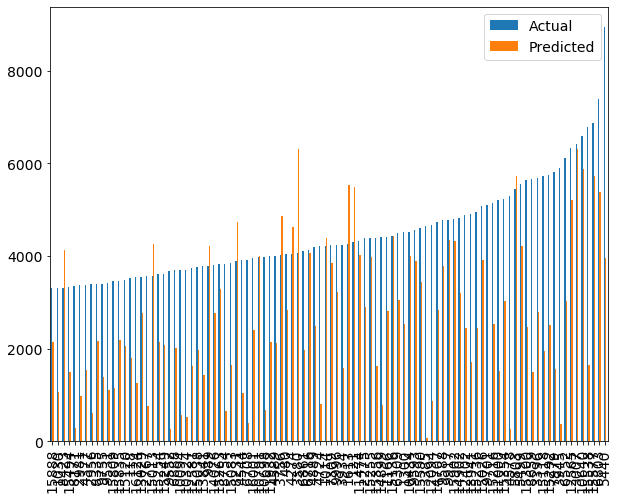

In [251]:
comp_regression_result.sort_values(by='Actual').tail(100).plot(kind='bar');

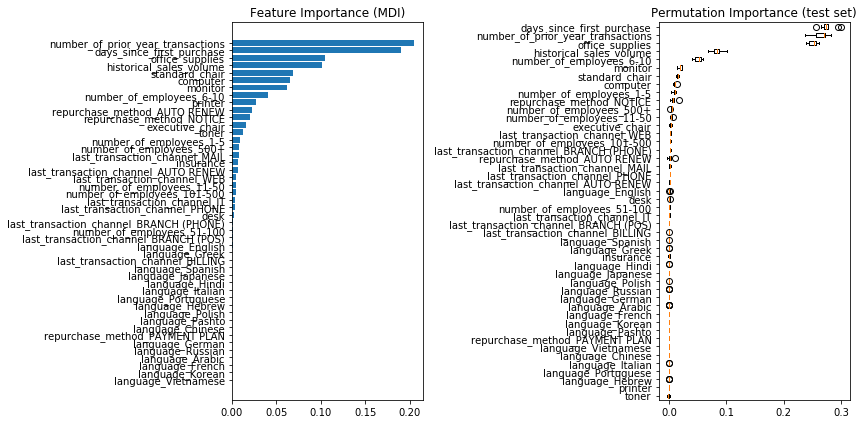

In [171]:
from sklearn.inspection import permutation_importance

feature_importance = model2_gbr.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(X_train_prepared.columns)[sorted_idx])
plt.title('Feature Importance (MDI)')

result = permutation_importance(model2_gbr, X_test_prepared, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_train_prepared.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [172]:
get_feat_imp(X_train_prepared, model2_gbr)

,Feature,Coef. Importance
1,number_of_prior_year_transactions,0.2047
2,days_since_first_purchase,0.1898
11,office_supplies,0.1045
0,historical_sales_volume,0.1009
5,standard_chair,0.0683
8,computer,0.0650
6,monitor,0.0616
28,number_of_employees_6-10,0.0403
7,printer,0.0274
12,repurchase_method_AUTO RENEW,0.0221


In [202]:
feat_imp_reg = get_feat_imp(X_train_prepared, model2_gbr)
feat_imp_reg.to_excel("fi_reg.xlsx")

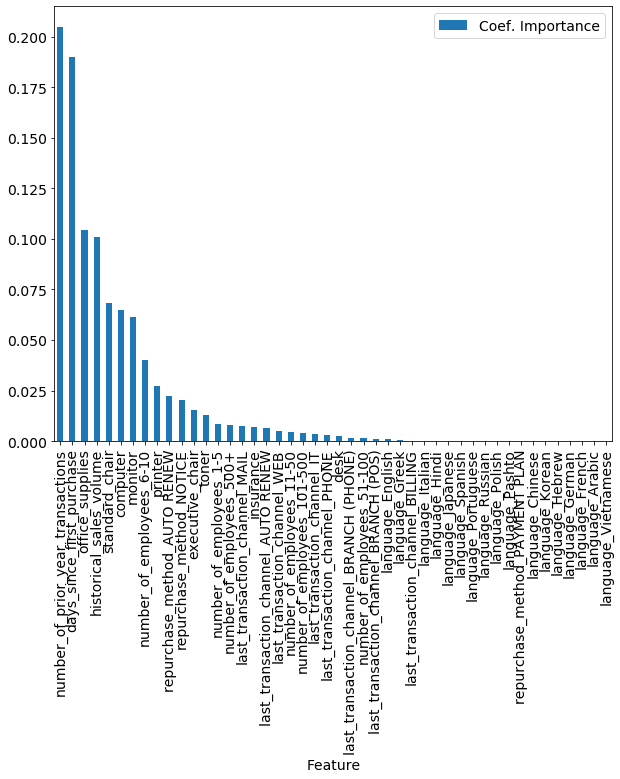

In [204]:
feat_imp_reg.plot(kind='bar', x='Feature')

## Model validation

In [175]:
# set some global plotting parameters...
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 14

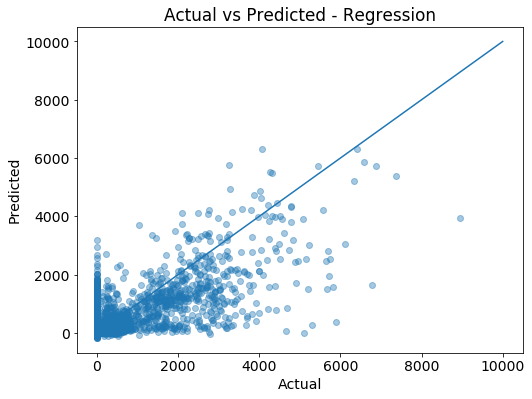

In [176]:
fig, ax = plt.subplots(1,1, figsize=(8, 6))
ax.scatter(x=y_test, y=model2_gbr_preds_test, alpha=0.4);
ax.plot([0, 10000],[0, 10000])
ax.set_title("Actual vs Predicted - Regression", fontsize=16)
# ax.set_xlabel("Actual")
# ax.set_ylabel("Predicted");

ax.set(title="Actual vs Predicted - Regression", xlabel='Actual', ylabel='Predicted');

In [177]:
# get residuals
residuals = model2_gbr_preds_test - y_test

In [178]:
from sklearn.metrics import f1_score
# training classification preds
y_train_pred_proba = model2_rfc.predict_proba(X_train_prepared)[:,1]

# possible thresholds
thresholds_train = np.linspace(min(y_train_pred_proba), 
                               max(y_train_pred_proba) - 0.1, 100)

# list to hold scores on train and test
train_f1_scores = []

for t in thresholds_train:
    train_f1_scores.append(f1_score(
        y_train_class, y_train_pred_proba > t, pos_label=1))

#find optimal precision score
optimal_t = float(thresholds_train[train_f1_scores==max(train_f1_scores)])
print("Threshold maximising f1 score - {}".format(optimal_t))

Threshold maximising f1 score - 0.2760710473029988


In [179]:
print(optimal_t)

0.2760710473029988


In [180]:
print(classification_report(y_train_class, y_train_pred_proba > optimal_t))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5899
           1       0.80      0.90      0.85      2187

    accuracy                           0.91      8086
   macro avg       0.88      0.91      0.89      8086
weighted avg       0.92      0.91      0.91      8086



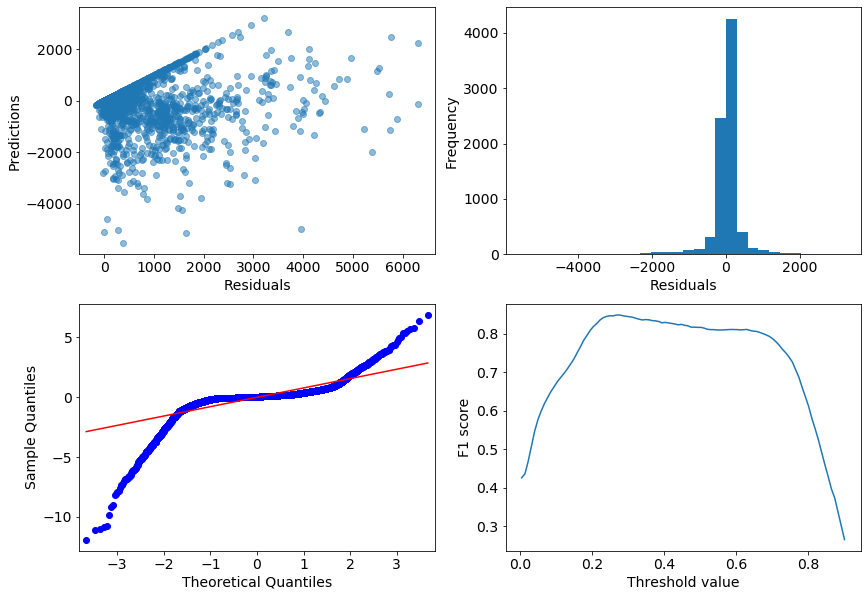

In [181]:
# plot predictions vs residuals
fig, axes = plt.subplots(2,2,figsize=(14,10))

# plot scatter on upper left plot
axes[0,0].scatter(x=model2_gbr_preds_test, y=residuals, alpha=0.5)
axes[0,0].set(xlabel="Residuals",ylabel="Predictions");

# plot hist on upper right plot
axes[0,1].hist(residuals, bins=30)
axes[0,1].set(xlabel='Residuals', ylabel='Frequency');

# plot qq plot on lower left
from statsmodels.api import qqplot
qqplot(residuals, fit=True, line='r', ax=axes[1,0])

# classifier thresholds on lower right
axes[1,1].plot(thresholds_train, train_f1_scores)
axes[1,1].set(xlabel="Threshold value",ylabel="F1 score");

In [182]:
np.std(-cross_val_score(model2_gbr, X_train_prepared, y_train, cv=10, scoring='neg_root_mean_squared_error'))

46.24760608534835

## Profit calculator

In [183]:
preds_class = model2_rfc.predict(X_test_prepared)
preds_class

array([0, 1, 0, ..., 0, 0, 0])

In [184]:
preds_class_prob = model2_rfc.predict_proba(X_test_prepared)[:,1]
preds_class_prob

array([0.02834591, 0.78432382, 0.10212476, ..., 0.0181447 , 0.07677544,
       0.02926297])

In [185]:
preds_reg = model2_gbr.predict(X_test_prepared)
preds_reg

array([ -9.10231688, 202.02777919, 314.39076744, ...,  10.85213149,
        -9.90181607,  -7.92392571])

In [186]:
expected_profit = pd.Series(((0.22*preds_class_prob*preds_reg) - (8.40*preds_class) - 45.65), index=X_test_prepared.index)
expected_profit

5263    -45.706763
11766   -19.189856
5319    -38.586442
4807    -31.204245
7311    -15.074861
           ...    
4387     -7.896517
15942   -45.134851
1281    -45.606680
780     -45.817248
1334    -45.701013
Length: 8086, dtype: float64

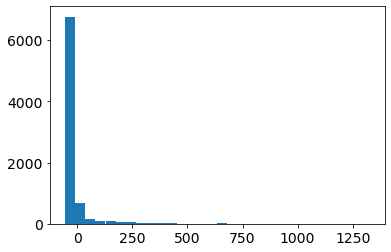

In [187]:
fig, ax = plt.subplots(1,1, figsize=(6, 4))
plt.hist(expected_profit, bins=30)
plt.show()

In [235]:
expected_profit_sorted = expected_profit.sort_values(ascending=False)
expected_profit_sorted[0:799]

3007     1325.000575
3380     1294.793017
5803     1168.503262
1613     1148.521402
10640    1141.341274
            ...     
13515      13.377186
4900       13.321230
723        13.192361
15289      13.042500
4724       12.809680
Length: 799, dtype: float64

In [189]:
def prof_deciles(series):
    dec = 800
    x = 0
    avgs = []
    for i in range(0, 10):
        avg = round(series[x:x+799].mean(), 2)
        avgs.append(avg)
        x += 800
    return avgs

In [190]:
profit_avgs = prof_deciles(expected_profit_sorted)
profit_avgs

[189.14, -5.64, -25.02, -38.67, -42.2, -43.72, -45.04, -45.51, -45.65, -45.78]

In [191]:
expected_profit_sorted[0:799].index

Int64Index([ 3007,  3380,  5803,  1613, 10640,   121, 10800, 15577,  2537,
            12565,
            ...
             7099,  8852, 13565, 13197, 11118, 13515,  4900,   723, 15289,
             4724],
           dtype='int64', length=799)

In [192]:
df1 = pd.read_excel('Office Supply Campaign ResultS 7-23-19.xlsx')

In [193]:
first_decile = df1.loc[expected_profit_sorted[0:799].index]
first_decile.head(3)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language
3007,6807415.0,6421.000000,1.078728e+06,1964-11-15,44.0,1.0,1.0,1.0,AUTO RENEW,AUTO RENEW,Y,Y,Y,Y,Y,Y,Y,Y,Y,,NaN
3380,7699413.0,4066.666667,3.985333e+06,1977-10-15,43.0,0.0,0.0,0.0,AUTO RENEW,PHONE,Y,Y,Y,Y,Y,Y,Y,Y,Y,,NaN
5803,13021726.0,5445.000000,1.306800e+06,1969-09-01,42.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,Y,Y,Y,Y,Y,Y,Y,Y,,NaN


In [194]:
first_decile['Number of Employees'] = first_decile['Number of Employees'].replace(' ', np.nan)

In [195]:
first_decile['Days since First Purchase'] = create_number_days(first_decile['Date of First Purchase'])

In [196]:
first_decile['Year'] = pd.DatetimeIndex(first_decile['Date of First Purchase']).year

In [197]:
first_decile.head(3)

,Customer Number,Campaign Period Sales,Historical Sales Volume,Date of First Purchase,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Repurchase Method,Last Transaction Channel,Desk,Executive Chair,Standard Chair,Monitor,Printer,Computer,Insurance,Toner,Office Supplies,Number of Employees,Language,Days since First Purchase,Year
3007,6807415.0,6421.000000,1.078728e+06,1964-11-15,44.0,1.0,1.0,1.0,AUTO RENEW,AUTO RENEW,Y,Y,Y,Y,Y,Y,Y,Y,Y,NaN,NaN,20301,1964
3380,7699413.0,4066.666667,3.985333e+06,1977-10-15,43.0,0.0,0.0,0.0,AUTO RENEW,PHONE,Y,Y,Y,Y,Y,Y,Y,Y,Y,NaN,NaN,15584,1977
5803,13021726.0,5445.000000,1.306800e+06,1969-09-01,42.0,0.0,0.0,0.0,AUTO RENEW,AUTO RENEW,N,Y,Y,Y,Y,Y,Y,Y,Y,NaN,NaN,18550,1969


In [198]:
first_decile['Years since First Purchase'] = first_decile['Days since First Purchase']/365

In [199]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [200]:
first_decile.to_excel("decile.xlsx")

In [218]:
expected_profit_df = pd.DataFrame(expected_profit_sorted[0:799], index=expected_profit_sorted[0:799].index)

In [220]:
expected_profit_df.sum()

0    151123.35778
dtype: float64

In [222]:
first_decile['Number of Employees'].value_counts()

6-10       122
101-500     49
51-100      47
11-50       44
500+        29
1-5         12
Name: Number of Employees, dtype: int64

In [223]:
first_decile['Language'].value_counts()

English       261
Spanish         3
Portuguese      1
Polish          1
Name: Language, dtype: int64

In [239]:
first_decile['Campaign Period Sales'].sum()

1206613.971295238

In [238]:
ne_df = first_decile.groupby(['Number of Employees']).mean()
ne_df

,Customer Number,Campaign Period Sales,Historical Sales Volume,Number of Prior Year Transactions,Do Not Direct Mail Solicit,Do Not Email,Do Not Telemarket,Days since First Purchase,Year,Years since First Purchase
Number of Employees,,,,,,,,,,
1-5,1.589876e+07,162.513733,3.132717e+05,17.000000,0.000000,0.083333,0.000000,16656.416667,1974.333333,45.634018
101-500,1.796078e+07,786.231714,2.001914e+06,17.142857,0.040816,0.122449,0.040816,12613.510204,1985.408163,34.557562
11-50,1.802135e+07,490.144782,1.044477e+06,18.659091,0.113636,0.159091,0.090909,12055.227273,1986.954545,33.028020
500+,1.652161e+07,1562.768690,3.272263e+06,17.551724,0.068966,0.068966,0.068966,11909.413793,1987.344828,32.628531
51-100,1.389708e+07,577.149021,1.293063e+06,18.000000,0.085106,0.191489,0.085106,13359.659574,1983.425532,36.601807
6-10,1.777296e+07,251.578132,7.097838e+05,19.401639,0.090164,0.229508,0.090164,13300.532787,1983.598361,36.439816


In [227]:
ne_df.to_excel("ne_df.xlsx")

In [234]:
second_decile = expected_profit_sorted[800:1599]
second_decile

4825     12.587518
12073    12.347160
9428     12.180919
12705    12.118605
7118     12.047305
           ...    
6683    -15.476086
14000   -15.488176
6571    -15.510144
9019    -15.523819
5644    -15.566839
Length: 799, dtype: float64